<h1 style="text-align: center;">MoMo: Final Practice - B3</h1>
<h3 style="text-align: center;">Diego Ontiveros</h3>
<br />
<center>In this notebook the data gathered from the MC simulation is analysed and visualized. It gathers and plots toghether information of all the runs performed.</center>
<br />
<br />

In [4]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Time series polts for T = 2.0, 2.27, 2.6 (L=100) and 2.0 (L=20) runs.

L100T2.0/out.dat
L100T2.27/out.dat
L100T2.6/out.dat
L20T2.0/out.dat


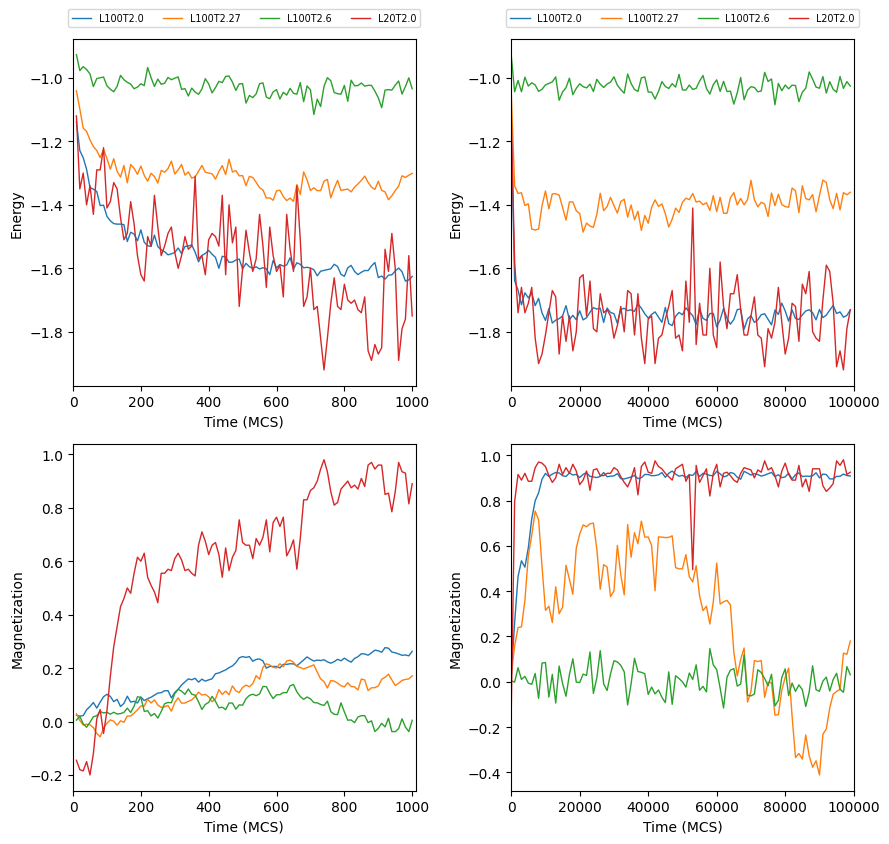

In [5]:
# Loading runs data from file
dirs = os.listdir()
fig, ax = plt.subplots(2,2, figsize = (9,8.5))


for dir in dirs:
    if dir.startswith(("L100T2.0","L100T2.27","L100T2.6","L20")):
        path = dir + "/out.dat"
        print(path)
        
        L = int(open(path).readline().split("=")[-1]) 
        N = L*L
        

        data = np.loadtxt(path,skiprows=2,max_rows=10000)
        t,E,M = data.T     # Getting each parameter
        nmeas = t[1] - t[0]
    
        E = E/N; M = M/N

        start = 0
        finish = (np.array((1000,100000))/nmeas).astype(int)    # 1e3 and 1e5 MCS

        for i in range(2):
            if i==1: step = 100 
            else: step = 1
            time = t[start:finish[i]:step]
            energy = E[start:finish[i]:step]
            magnetization = M[start:finish[i]:step]

            ax[0,i].plot(time,energy, lw=1,label=dir)
            ax[1,i].plot(time,magnetization, lw=1,label=dir)

            ax[0,i].set_xlim(0,time[-1]+step*nmeas);ax[1,i].set_xlim(0,time[-1]+step*nmeas)

            ax[0,i].set_ylabel("Energy");ax[1,i].set_ylabel("Magnetization")
            ax[0,i].set_xlabel("Time (MCS)");ax[1,i].set_xlabel("Time (MCS)")

ax[0,0].legend(loc = "upper center", fontsize = "x-small",bbox_to_anchor=(0.5, 1.1),fancybox=True,ncol=4)
ax[0,1].legend(loc = "upper center", fontsize = "x-small",bbox_to_anchor=(0.5, 1.1),fancybox=True,ncol=4)


fig.tight_layout()
fig.savefig("timeSeries.jpg", dpi=600)
        


Energy and Magnetization plots vs. the diferent Temperatures studied.

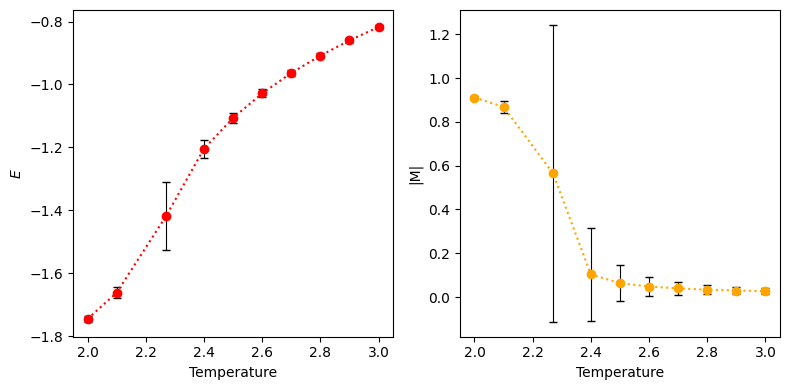

In [6]:
# Loading statistical data from file
dirs = os.listdir()

T = []
E = [[],[]]
M = [[],[]]
for dir in dirs:
    if dir.startswith(("L100")):
        path = dir + "/stats_out.dat"
        T.append(float(dir[5:]))

        with open(path,"r") as inFile:
            for line in inFile:

                if line.startswith("Average: <E>/N"):
                    line = line.strip().split()
                    mean,std = line[-3],line[-1]
                    E[0].append(float(mean))
                    E[1].append(float(std))
                    continue

                elif line.startswith("Average: <|M|>/N"):
                    line = line.strip().split()
                    mean,std = line[-3],line[-1]
                    M[0].append(float(mean))
                    M[1].append(float(std))
                    continue
E = np.array(E,dtype=object)
M = np.array(M,dtype=object)
T = np.array(T)
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,4))

ax1.errorbar(*zip(*sorted(zip(T, E[0], E[1]*100))), fmt=":o",c="red",capsize=3,  ecolor="k",elinewidth=0.8)
ax2.errorbar(*zip(*sorted(zip(T, M[0], M[1]*100))), fmt=":o",c="orange",capsize=3,  ecolor="k",elinewidth=0.8)
# Errorbars exaggerated by a factor of 100 to be appreciated.

ax1.set_xlabel("Temperature");ax2.set_xlabel("Temperature")
ax1.set_ylabel("$E$");ax2.set_ylabel("|M|")

fig.tight_layout()
fig.savefig("vsT.jpg", dpi=600)